In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def Serv_and_Eng_distribution(myType, myService_dataset, myUser_dataset):
    
    ## DEFINE THE DATASET INPUT VARIABLES
    
    Service_dataset = myService_dataset
    User_dataset = myUser_dataset
    
    ## IMPORT, CLEAN AND SORT THE DATASETS ABOUT THE SERVICE (variable) AND POPULATION
    
    Service = pd.read_excel(Service_dataset)
    Population = pd.read_csv('Resident population on 1st January.csv').set_index('Territory').sort_values('Territory')
    
    # List of the italian regions in aphabetic order
    Regions = ['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna', 'Friuli Venezia Giulia', 'Lazio', 
           'Liguria', 'Lombardia', 'Marche', 'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana', 
           'Trentino-Alto Adige', 'Umbria', "Valle d'Aosta", 'Veneto']
    
    ## NORMALIZATION OF THE NUMBER OF SERVICES 
    
    # Count the number for each region
    Number_for_region = []    

    for r in Regions:
        Rows_identification = Service.regione == r
        Rows_isolation = Service[Rows_identification]
        Number_for_region.append(len(Rows_isolation))
        
    # Normalize the value dividing by the number of inhabitants of each region 
    #(number for 1000 inhabitants)
    Pop_for_region = Population.Value
    
    Number_for_1000 = []

    for n in range(len(Number_for_region)):
        d = (Number_for_region[n]*1000)/Pop_for_region[n]
        Number_for_1000.append(round(d,3))
    
    ## IMPORT, CLEAN AND SORT THE DATASETS ABOUT THE USERS (variable)
    
    Users = pd.read_csv(User_dataset)
    Users = Users.dropna(1).set_index('Territory').sort_values('Territory')
    
    ## FILTER THE DATA BY TYPE OF USER AND YEAR
    
    Type = Users['Data type'] == myType
    Year = Users['Select time'] == 2019
    
    ## NORMALIZATION OF THE NUMBER OF USER 
    #(in this specific case the values are already normalized in the input dataset)
    
    Subset = Users[Type & Year].Value  
    
    #Users_for_inhabitants = []

    #for s in range(len(Subset)):
        #d = (Subset[s])/Pop_for_region[s]
        #Users_for_inhabitants.append(round(d,3))
    
    ## MERGE THE INFORMATION IN A DATAFRAME 
    
    df = pd.DataFrame(list(zip(Number_for_1000, Subset)), 
               columns =['Number for inhabitants', myType], index = Regions)
    
    ## IMPORT, CLEAN AND SORT THE SHAPEFILE
    
    Italy = 'Shapefile/Reg01012018_g_WGS84.shp'
    map_df = gpd.read_file(Italy)
    map_sorted = map_df.set_index('DEN_REG').sort_values('DEN_REG')
    
    ## JOIN THE DATAFRAMES 
    
    Merged_df = map_sorted.join(df)
    
    ## CREATE THE MAPS
    
    variable1 = 'Number for inhabitants'
    variable2 = myType

    fig, ax = plt.subplots(1,2, figsize=(20, 10))

    Merged_df.plot(column=variable1, cmap='Blues', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True,
                legend_kwds={'pad':0.01});
    ax[0].axis('off');
    ax[0].set_title('Number of libraries for 1000 inhabitants', fontdict={'fontsize': '20', 'fontweight' : '3'});

    Merged_df.plot(column=variable2, cmap='Reds', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True,
                legend_kwds={'pad':0.01});
    ax[1].axis('off');
    ax[1].set_title('Percentage of inhabitants who read ' + variable2, fontdict={'fontsize': '20', 'fontweight' : '3'});

    ## EXPORT THE GRAPHS AS IMAGE
    plt.savefig( 'Function02.png')


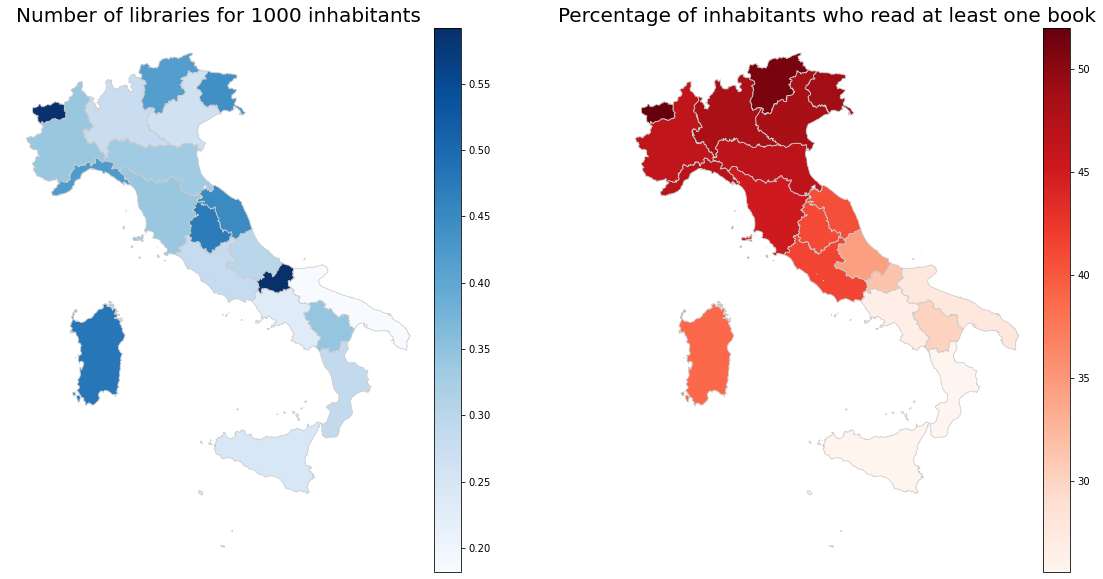

In [3]:
Serv_and_Eng_distribution('at least one book', 'Addresses of Italian libraries.xlsx',
         'Books - regions and type of municipality.csv')